In [8]:
import pandas as pd

# Load datasets
dmhas_data = pd.read_csv("C:/Users/samra/Downloads/DMHAS_Clients_Served_by_Town__Mental_Health_Substance_Use__20241128.csv")
impacted_areas_data = pd.read_csv("C:/Users/samra/Downloads/2023_Disproportionately_Impacted_Areas_20241128.csv")
places_data = pd.read_csv("C:/Users/samra/Downloads/PLACES__Local_Data_for_Better_Health__County_Data_2024_release_20241201.csv")

# Inspect the first few rows of each dataset
print("DMHAS Data:")
print(dmhas_data.head())

print("\nImpacted Areas Data:")
print(impacted_areas_data.head())

print("\nPLACES Data:")
print(places_data.head())

DMHAS Data:
      Town  Fiscal Year   Program Type  Town Year Count
0  Andover         2018  Mental Health               37
1  Andover         2018  Substance Use               44
2  Andover         2019  Mental Health               30
3  Andover         2019  Substance Use               44
4  Andover         2020  Mental Health               32

Impacted Areas Data:
        GEOID     Town(s)  Median Household Income  Poverty Rate  \
0  9009140200   New Haven                  19457.0          0.30   
1  9001074000  Bridgeport                  37350.0          0.23   
2  9001070300  Bridgeport                  18093.0          0.54   
3  9003500300    Hartford                  18185.0          0.49   
4  9003500400    Hartford                  44792.0          0.25   

   Census Population  Conviction Count  Conviction Rate  DIA  \
0                543            563.44             1.04    1   
1               2262           1462.55             0.65    1   
2               1359         

C:\Users\samra\AppData\Local\Temp\ipykernel_23132\3010760153.py:6: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  places_data = pd.read_csv("C:/Users/samra/Downloads/PLACES__Local_Data_for_Better_Health__County_Data_2024_release_20241201.csv")


In [9]:
# Start with cleaning dmhas dataset
dmhas_data.head()

,Town,Fiscal Year,Program Type,Town Year Count
0,Andover,2018,Mental Health,37
1,Andover,2018,Substance Use,44
2,Andover,2019,Mental Health,30
3,Andover,2019,Substance Use,44
4,Andover,2020,Mental Health,32


In [16]:

# Inspect structure and missing values
print(dmhas_data.info())
print(dmhas_data.isnull().sum())

# Drop duplicate rows
dmhas_data = dmhas_data.drop_duplicates()

print(dmhas_data.head())

print(dmhas_data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Town             2015 non-null   object
 1   Fiscal Year      2015 non-null   int64 
 2   Program Type     2015 non-null   object
 3   Town Year Count  2015 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 63.1+ KB
None
Town               0
Fiscal Year        0
Program Type       0
Town Year Count    0
dtype: int64
      Town  Fiscal Year   Program Type  Town Year Count
0  Andover         2018  Mental Health               37
1  Andover         2018  Substance Use               44
2  Andover         2019  Mental Health               30
3  Andover         2019  Substance Use               44
4  Andover         2020  Mental Health               32
Index(['Town', 'Fiscal Year', 'Program Type', 'Town Year Count'], dtype='object')


In [19]:
# Aggregate total clients served by town
aggregated_data = dmhas_data.groupby('Town')['Clients Served'].sum().reset_index()

# Rename the column for clarity
aggregated_data.rename(columns={'Clients Served': 'Total Clients Served'}, inplace=True)

print(aggregated_data)



              Town  Total Clients Served
0          Andover                   443
1          Ansonia                  4629
2          Ashford                   698
3             Avon                   762
4      Barkhamsted                   592
..             ...                   ...
164  Windsor Locks                  3194
165        Wolcott                  1825
166     Woodbridge                   365
167       Woodbury                   741
168      Woodstock                   765

[169 rows x 2 columns]


In [20]:
# Aggregate total clients served by town
aggregated_data = dmhas_data.groupby('Town')['Clients Served'].sum().reset_index()

# Rename the column for clarity
aggregated_data.rename(columns={'Clients Served': 'Total Clients Served'}, inplace=True)

# Print the aggregated data
print(aggregated_data)


              Town  Total Clients Served
0          Andover                   443
1          Ansonia                  4629
2          Ashford                   698
3             Avon                   762
4      Barkhamsted                   592
..             ...                   ...
164  Windsor Locks                  3194
165        Wolcott                  1825
166     Woodbridge                   365
167       Woodbury                   741
168      Woodstock                   765

[169 rows x 2 columns]


In [21]:
# Aggregate clients served by town and program type
aggregated_data2 = dmhas_data.groupby(['Town', 'Program Type'])['Clients Served'].sum().reset_index()

print(aggregated_data2)


           Town   Program Type  Clients Served
0       Andover  Mental Health             198
1       Andover  Substance Use             245
2       Ansonia  Mental Health            2957
3       Ansonia  Substance Use            1672
4       Ashford  Mental Health             303
..          ...            ...             ...
332  Woodbridge  Substance Use             188
333    Woodbury  Mental Health             349
334    Woodbury  Substance Use             392
335   Woodstock  Mental Health             402
336   Woodstock  Substance Use             363

[337 rows x 3 columns]


In [22]:
# Rename columns for clarity
dmhas_data.rename(columns={
    'Town Year Count': 'Clients Served'
}, inplace=True)

dmhas_data.head()

,Town,Fiscal Year,Program Type,Clients Served
0,Andover,2018,Mental Health,37
1,Andover,2018,Substance Use,44
2,Andover,2019,Mental Health,30
3,Andover,2019,Substance Use,44
4,Andover,2020,Mental Health,32


In [23]:
# Total clients served per year
year_summary = dmhas_data.groupby('Fiscal Year')['Clients Served'].sum().reset_index()
year_summary.rename(columns={'Clients Served': 'Total Clients Served'}, inplace=True)
print(year_summary)


   Fiscal Year  Total Clients Served
0         2018                104743
1         2019                105651
2         2020                 97561
3         2021                 92184
4         2022                100328
5         2023                100823


In [24]:
# Cleaning the disporportionately impacted areas dataset

# Inspect structure and missing values
print(impacted_areas_data.info())
print(impacted_areas_data.isnull().sum())
print(impacted_areas_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GEOID                    883 non-null    int64  
 1   Town(s)                  879 non-null    object 
 2   Median Household Income  869 non-null    float64
 3   Poverty Rate             872 non-null    float64
 4   Census Population        883 non-null    int64  
 5   Conviction Count         883 non-null    float64
 6   Conviction Rate          876 non-null    float64
 7   DIA                      883 non-null    int64  
 8   Geometry                 883 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 62.2+ KB
None
GEOID                       0
Town(s)                     4
Median Household Income    14
Poverty Rate               11
Census Population           0
Conviction Count            0
Conviction Rate             7
DIA                     

In [25]:
# Check which rows have missing values
print(impacted_areas_data.isnull().sum())

# View rows with missing data
missing_data = impacted_areas_data[impacted_areas_data.isnull().any(axis=1)]
print(missing_data)


GEOID                       0
Town(s)                     4
Median Household Income    14
Poverty Rate               11
Census Population           0
Conviction Count            0
Conviction Rate             7
DIA                         0
Geometry                    0
dtype: int64
          GEOID          Town(s)  Median Household Income  Poverty Rate  \
318  9013881200        Mansfield                      NaN          0.66   
332  9003980100         Hartford                      NaN           NaN   
686  9003477104         Suffield                      NaN          0.01   
841  9013538100           Somers                      NaN           NaN   
865  9003417300      New Britain                      NaN           NaN   
873  9011980000  Groton, Ledyard                      NaN           NaN   
874  9001211100          Danbury                      NaN          0.00   
876  9001990000              NaN                      NaN           NaN   
877  9003980001      East Granby          

In [26]:
impacted_areas_data['Town(s)'].fillna('Unknown', inplace=True)
impacted_areas_data['Median Household Income'].fillna(impacted_areas_data['Median Household Income'].median(), inplace=True)
impacted_areas_data['Poverty Rate'].fillna(impacted_areas_data['Poverty Rate'].median(), inplace=True)

print(impacted_areas_data)

          GEOID        Town(s)  Median Household Income  Poverty Rate  \
0    9009140200      New Haven                  19457.0          0.30   
1    9001074000     Bridgeport                  37350.0          0.23   
2    9001070300     Bridgeport                  18093.0          0.54   
3    9003500300       Hartford                  18185.0          0.49   
4    9003500400       Hartford                  44792.0          0.25   
..          ...            ...                      ...           ...   
878  9003980002  Windsor Locks                  87100.0          0.07   
879  9003980003       Suffield                  87100.0          0.07   
880  9007990100        Unknown                  87100.0          0.07   
881  9009990000        Unknown                  87100.0          0.07   
882  9011990100        Unknown                  87100.0          0.07   

     Census Population  Conviction Count  Conviction Rate  DIA  \
0                  543            563.44             1.04

In [27]:
# Check for duplicates based on the 'GEOID' column
duplicates = impacted_areas_data.duplicated(subset='GEOID', keep=False)
print(impacted_areas_data[duplicates])

# Drop duplicates if necessary
impacted_areas_data = impacted_areas_data.drop_duplicates(subset='GEOID')


Empty DataFrame
Columns: [GEOID, Town(s), Median Household Income, Poverty Rate, Census Population, Conviction Count, Conviction Rate, DIA, Geometry]
Index: []


In [28]:
# Check for missing values in the dataset
print(impacted_areas_data.isnull().sum())


GEOID                      0
Town(s)                    0
Median Household Income    0
Poverty Rate               0
Census Population          0
Conviction Count           0
Conviction Rate            7
DIA                        0
Geometry                   0
dtype: int64


In [29]:
# Fill missing Conviction Rate with median value
impacted_areas_data['Conviction Rate'].fillna(
    impacted_areas_data['Conviction Rate'].median(), inplace=True
)

print(impacted_areas_data.isnull().sum())


GEOID                      0
Town(s)                    0
Median Household Income    0
Poverty Rate               0
Census Population          0
Conviction Count           0
Conviction Rate            0
DIA                        0
Geometry                   0
dtype: int64


In [30]:
impacted_areas_data.head()

,GEOID,Town(s),Median Household Income,Poverty Rate,Census Population,Conviction Count,Conviction Rate,DIA,Geometry
0,9009140200,New Haven,19457.0,0.30,543,563.44,1.04,1,"POLYGON ((-72.93105899999999 41.294536, -72.93..."
1,9001074000,Bridgeport,37350.0,0.23,2262,1462.55,0.65,1,"POLYGON ((-73.186159 41.18302, -73.18587 41.18..."
2,9001070300,Bridgeport,18093.0,0.54,1359,874.86,0.64,1,"POLYGON ((-73.218529 41.165622, -73.218299 41...."
3,9003500300,Hartford,18185.0,0.49,1937,1242.50,0.64,1,"POLYGON ((-72.683098 41.751238, -72.683083 41...."
4,9003500400,Hartford,44792.0,0.25,1862,1182.67,0.64,1,"POLYGON ((-72.675134 41.755818, -72.673624 41...."


In [33]:
import geopandas as gpd
from shapely import wkt

# Convert WKT strings to geometry objects
impacted_areas_data['Geometry'] = impacted_areas_data['Geometry'].apply(wkt.loads)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(impacted_areas_data, geometry='Geometry')

# Verify the GeoDataFrame
print(gdf.head())


        GEOID     Town(s)  Median Household Income  Poverty Rate  \
0  9009140200   New Haven                  19457.0          0.30   
1  9001074000  Bridgeport                  37350.0          0.23   
2  9001070300  Bridgeport                  18093.0          0.54   
3  9003500300    Hartford                  18185.0          0.49   
4  9003500400    Hartford                  44792.0          0.25   

   Census Population  Conviction Count  Conviction Rate  DIA  \
0                543            563.44             1.04    1   
1               2262           1462.55             0.65    1   
2               1359            874.86             0.64    1   
3               1937           1242.50             0.64    1   
4               1862           1182.67             0.64    1   

                                            Geometry  
0  POLYGON ((-72.93106 41.29454, -72.93083 41.294...  
1  POLYGON ((-73.18616 41.18302, -73.18587 41.183...  
2  POLYGON ((-73.21853 41.16562, -73.2183

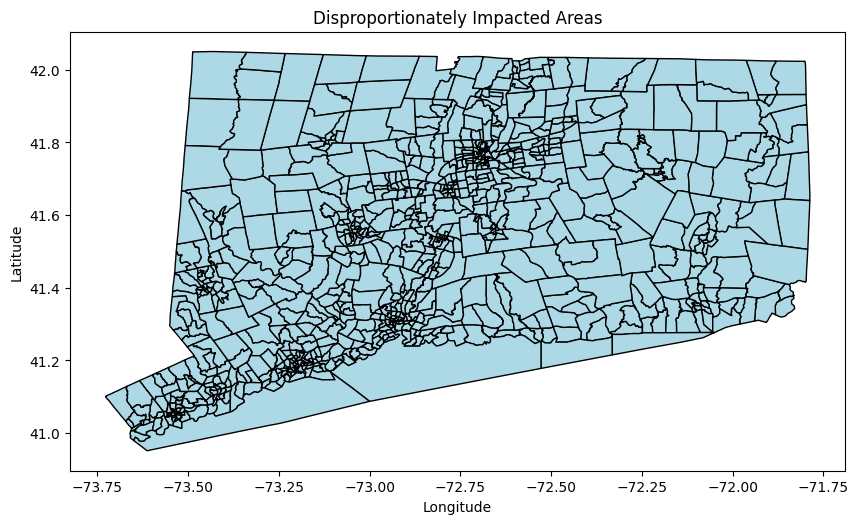

In [34]:
import matplotlib.pyplot as plt

# Plot the geometry
gdf.plot(figsize=(10, 10), color='lightblue', edgecolor='black')
plt.title("Disproportionately Impacted Areas")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


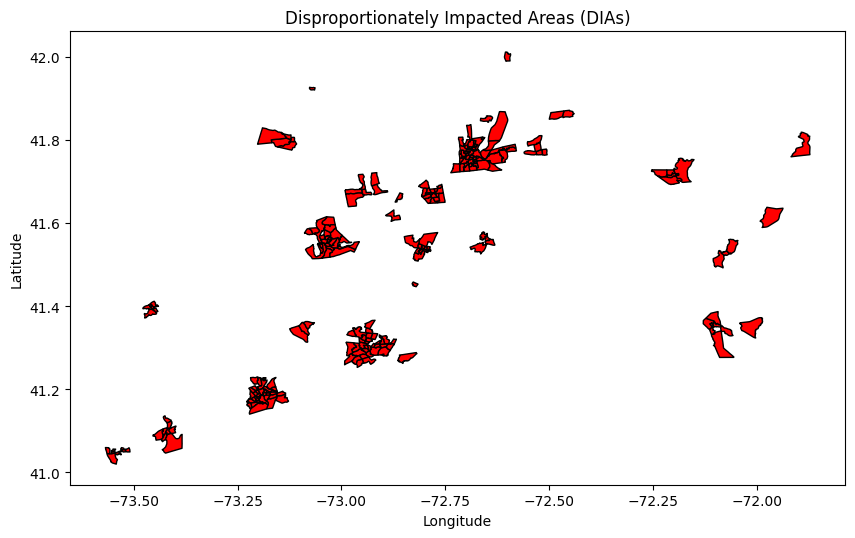

In [35]:
# Filter for DIAs
dia_gdf = gdf[gdf['DIA'] == 1]

# Plot only DIAs
dia_gdf.plot(figsize=(10, 10), color='red', edgecolor='black')
plt.title("Disproportionately Impacted Areas (DIAs)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [45]:
# Calculate summary statistics for DIAs
dia_summary = dia_gdf[['Median Household Income', 'Poverty Rate', 'Census Population']].describe()
print(dia_summary)


       Median Household Income  Poverty Rate  Census Population
count               237.000000    237.000000         237.000000
mean              49641.459916      0.241941        3793.126582
std               18067.369950      0.108450        1443.784364
min               11715.000000      0.100000         543.000000
25%               38209.000000      0.160000        2750.000000
50%               48036.000000      0.210000        3602.000000
75%               59306.000000      0.300000        4747.000000
max              133750.000000      0.720000        7992.000000


In [46]:
# Group by DIA status
summary_by_dia = gdf.groupby('DIA')[['Median Household Income', 'Poverty Rate', 'Census Population']].mean()
print(summary_by_dia)


     Median Household Income  Poverty Rate  Census Population
DIA                                                          
0              109095.995356      0.059969        4190.360681
1               49641.459916      0.241941        3793.126582


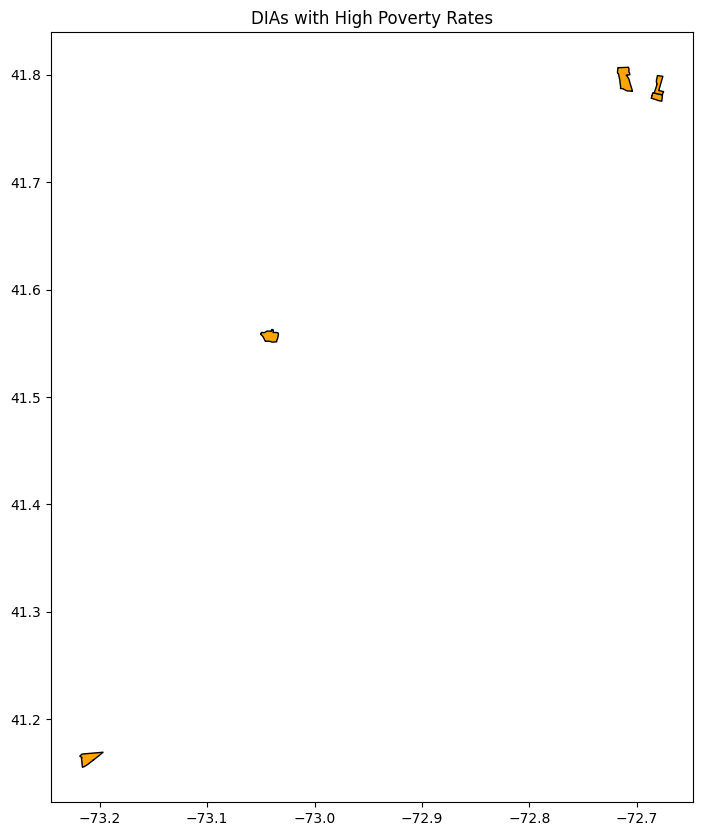

In [47]:
# Filter DIAs with poverty rate > 50%
high_poverty_dias = dia_gdf[dia_gdf['Poverty Rate'] > 0.5]

# Plot high poverty DIAs
high_poverty_dias.plot(figsize=(10, 10), color='orange', edgecolor='black')
plt.title("DIAs with High Poverty Rates")
plt.show()


In [48]:
# Save the plot
plt.savefig("disproportionately_impacted_areas.png")


<Figure size 640x480 with 0 Axes>

In [49]:
# Filter for DIAs only
dia_gdf = gdf[gdf['DIA'] == 1]

# Count unique towns in DIAs
dia_towns = dia_gdf['Town(s)'].value_counts()

# Print the towns with DIAs
print("Towns with Disproportionately Impacted Areas:")
print(dia_towns)


Towns with Disproportionately Impacted Areas:
Town(s)
Hartford         39
Bridgeport       33
Waterbury        23
New Haven        23
New Britain      15
Meriden          10
Stamford          8
Norwalk           8
West Haven        8
East Hartford     8
New London        6
Bristol           6
Danbury           5
Manchester        5
Torrington        5
Windham           5
Middletown        4
Norwich           3
Groton            2
Hamden            2
Vernon            2
Ansonia           2
Stratford         2
Bloomfield        1
Enfield           1
Derby             1
Winchester        1
Killingly         1
West Hartford     1
Wallingford       1
Griswold          1
Southington       1
Branford          1
Plainville        1
Windsor           1
South Windsor     1
Name: count, dtype: int64


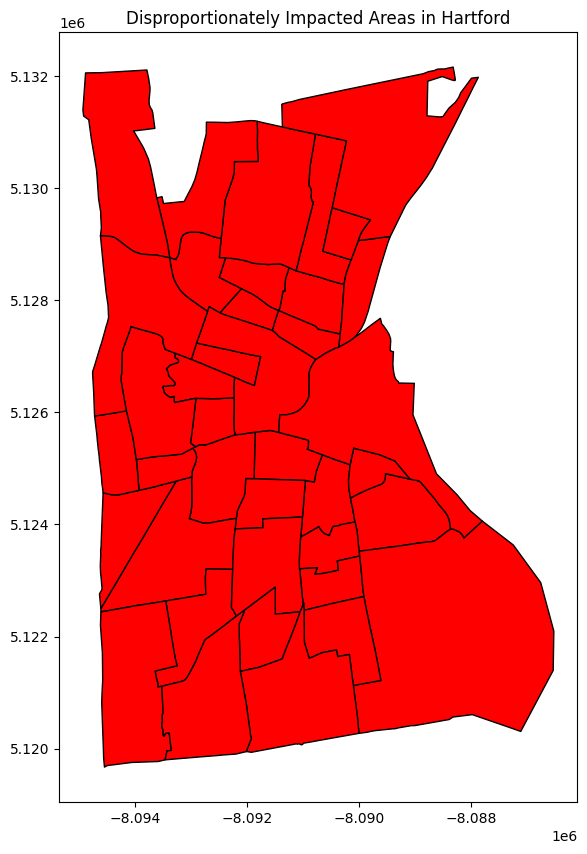

In [50]:
# Filter DIAs for a specific town (Hartford)
hartford_dias = dia_gdf[dia_gdf['Town(s)'] == 'Hartford']

# Plot DIAs in Hartford
hartford_dias.plot(figsize=(10, 10), color='red', edgecolor='black')
plt.title("Disproportionately Impacted Areas in Hartford")
plt.show()


In [51]:
# Filter for top towns
top_towns = dia_gdf[dia_gdf['Town(s)'].isin(['Hartford', 'Bridgeport', 'Waterbury', 'New Haven'])]

# Summarize key metrics for top towns
top_town_summary = top_towns.groupby('Town(s)')[['Median Household Income', 'Poverty Rate', 'Census Population']].mean()

print(top_town_summary)


            Median Household Income  Poverty Rate  Census Population
Town(s)                                                             
Bridgeport             45555.121212      0.267879        3789.575758
Hartford               38251.051282      0.314103        2958.794872
New Haven              45461.521739      0.280000        4249.782609
Waterbury              47661.739130      0.256087        3940.304348


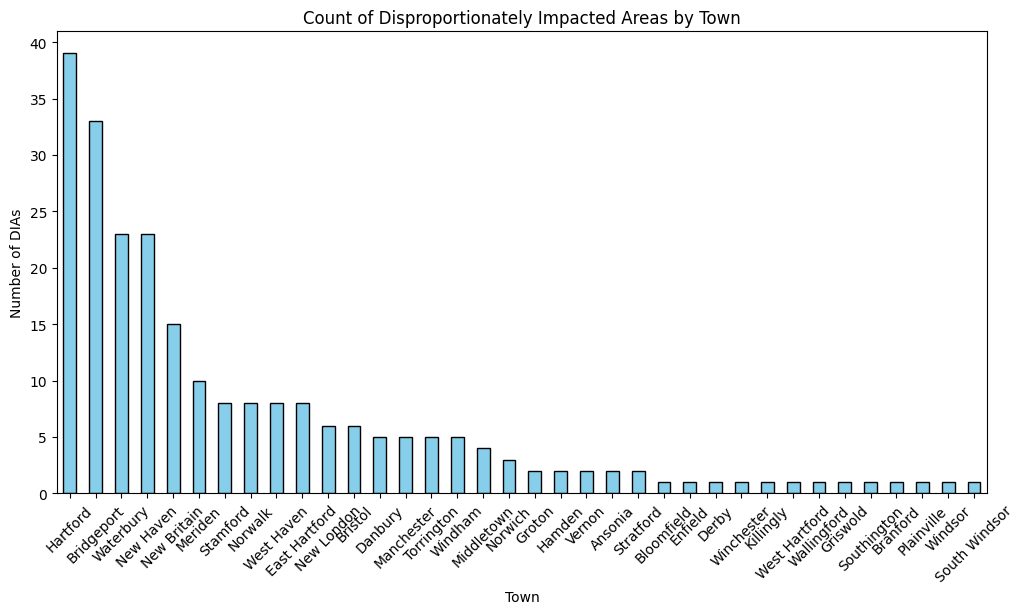

In [52]:
# Bar plot for DIAs by town
dia_counts = dia_gdf['Town(s)'].value_counts()
dia_counts.plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.title("Count of Disproportionately Impacted Areas by Town")
plt.ylabel("Number of DIAs")
plt.xlabel("Town")
plt.xticks(rotation=45)
plt.show()


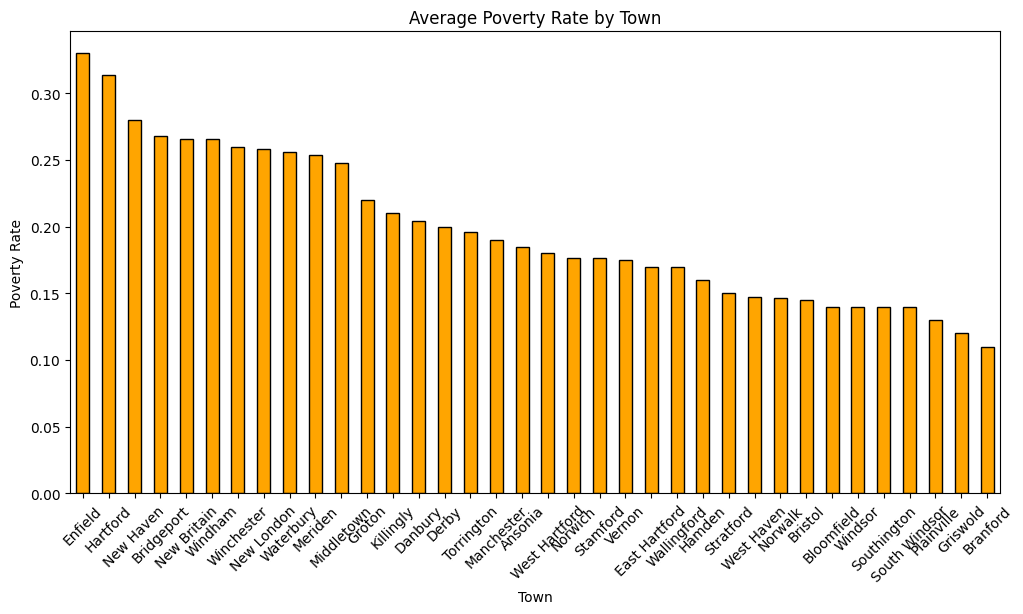

In [54]:
# Poverty rate comparison
poverty_rate = dia_gdf.groupby('Town(s)')['Poverty Rate'].mean().sort_values(ascending=False)

# Plot
poverty_rate.plot(kind='bar', figsize=(12, 6), color='orange', edgecolor='black')
plt.title("Average Poverty Rate by Town")
plt.ylabel("Poverty Rate")
plt.xlabel("Town")
plt.xticks(rotation=45)
plt.show()


In [56]:
# Data Modeling 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = dia_gdf[['Median Household Income', 'Census Population', 'Conviction Count']]
y = dia_gdf['Poverty Rate']

# Handle missing values (if any)
X = X.dropna()
y = y.loc[X.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Display coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coef_df)



R^2 Score: 0.4983270264748849
Mean Squared Error: 0.005600251176982902
                   Feature  Coefficient
0  Median Household Income    -0.000003
1        Census Population    -0.000015
2         Conviction Count     0.000057


In [64]:
# PLACES dataset

print(places_data.head())


   Year StateAbbr      StateDesc LocationName DataSource         Category  \
0  2022        US  United States          NaN      BRFSS  Health Outcomes   
1  2022        AL        Alabama      Barbour      BRFSS       Disability   
2  2022        AL        Alabama      Calhoun      BRFSS  Health Outcomes   
3  2022        AL        Alabama     Chambers      BRFSS  Health Outcomes   
4  2022        AL        Alabama         Clay      BRFSS  Health Outcomes   

                           Measure Data_Value_Unit          Data_Value_Type  \
0  Diagnosed diabetes among adults               %         Crude prevalence   
1  Hearing disability among adults               %         Crude prevalence   
2              Stroke among adults               %  Age-adjusted prevalence   
3              Stroke among adults               %         Crude prevalence   
4              Stroke among adults               %         Crude prevalence   

   Data_Value  ... Low_Confidence_Limit High_Confidence_Limit 

In [65]:
print(places_data.info())
print(places_data.head())
print(places_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240886 entries, 0 to 240885
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Year                        240886 non-null  int64  
 1   StateAbbr                   240886 non-null  object 
 2   StateDesc                   240886 non-null  object 
 3   LocationName                240806 non-null  object 
 4   DataSource                  240886 non-null  object 
 5   Category                    240886 non-null  object 
 6   Measure                     240886 non-null  object 
 7   Data_Value_Unit             240886 non-null  object 
 8   Data_Value_Type             240886 non-null  object 
 9   Data_Value                  240886 non-null  float64
 10  Data_Value_Footnote_Symbol  14 non-null      object 
 11  Data_Value_Footnote         14 non-null      object 
 12  Low_Confidence_Limit        240886 non-null  float64
 13  High_Confidenc

In [66]:
print(places_data.isnull().sum())

Year                               0
StateAbbr                          0
StateDesc                          0
LocationName                      80
DataSource                         0
Category                           0
Measure                            0
Data_Value_Unit                    0
Data_Value_Type                    0
Data_Value                         0
Data_Value_Footnote_Symbol    240872
Data_Value_Footnote           240872
Low_Confidence_Limit               0
High_Confidence_Limit              0
TotalPopulation                    0
TotalPop18plus                     0
LocationID                         0
CategoryID                         0
MeasureId                          0
DataValueTypeID                    0
Short_Question_Text                0
Geolocation                       80
dtype: int64


In [70]:
# Focus on relevant columns
relevant_columns = ['Year', 'StateAbbr', 'LocationName', 'Category', 'Measure', 'Data_Value', 
                    'Low_Confidence_Limit', 'High_Confidence_Limit', 'TotalPopulation']
places_data = places_data[relevant_columns]


In [71]:
# Drop rows where info is missing
places_data = places_data.dropna(subset=['Data_Value', 'LocationName'])


In [74]:
# Display the first few rows of the dataset
print(places_data.head())


   Year StateAbbr LocationName         Category  \
1  2022        AL      Barbour       Disability   
2  2022        AL      Calhoun  Health Outcomes   
3  2022        AL     Chambers  Health Outcomes   
4  2022        AL         Clay  Health Outcomes   
5  2022        AL       Dallas  Health Outcomes   

                           Measure  Data_Value  Low_Confidence_Limit  \
1  Hearing disability among adults         9.6                   8.5   
2              Stroke among adults         3.7                   3.4   
3              Stroke among adults         5.6                   5.1   
4              Stroke among adults         5.3                   4.9   
5              Stroke among adults         5.2                   4.8   

   High_Confidence_Limit  TotalPopulation  
1                   10.7            24706  
2                    4.0           115788  
3                    6.0            34088  
4                    5.7            14198  
5                    5.7            3676

In [77]:
# Clean up column names
places_data.columns = (
    places_data.columns
    .str.replace('_', ' ')  # Replace underscores with spaces
    .str.title()  # Capitalize first letter of every word
)

# Verify the cleaned column names
print(places_data.columns)


Index(['Year', 'Stateabbr', 'Locationname', 'Category', 'Measure',
       'Data Value', 'Low Confidence Limit', 'High Confidence Limit',
       'Totalpopulation'],
      dtype='object')


In [80]:
places_data.rename(
    columns={
        'Stateabbr': 'State Abbr',
        'Locationname': 'Location Name',
        'Totalpopulation': 'Total Population'
    },
    inplace=True
)

# Verify the corrected column names
print(places_data.columns)


Index(['Year', 'State Abbr', 'Location Name', 'Category', 'Measure',
       'Data Value', 'Low Confidence Limit', 'High Confidence Limit',
       'Total Population'],
      dtype='object')


In [82]:
print(places_data.head())

   Year State Abbr Location Name         Category  \
1  2022         AL       Barbour       Disability   
2  2022         AL       Calhoun  Health Outcomes   
3  2022         AL      Chambers  Health Outcomes   
4  2022         AL          Clay  Health Outcomes   
5  2022         AL        Dallas  Health Outcomes   

                           Measure  Data Value  Low Confidence Limit  \
1  Hearing disability among adults         9.6                   8.5   
2              Stroke among adults         3.7                   3.4   
3              Stroke among adults         5.6                   5.1   
4              Stroke among adults         5.3                   4.9   
5              Stroke among adults         5.2                   4.8   

   High Confidence Limit  Total Population  
1                   10.7             24706  
2                    4.0            115788  
3                    6.0             34088  
4                    5.7             14198  
5                    5.

In [83]:
print(places_data.isnull().sum())


Year                     0
State Abbr               0
Location Name            0
Category                 0
Measure                  0
Data Value               0
Low Confidence Limit     0
High Confidence Limit    0
Total Population         0
dtype: int64


In [87]:
print(places_data.duplicated().sum())

# Remove duplicates if any
places_data = places_data.drop_duplicates()


0


In [88]:
# Filter for CT
places_ct = places_data[places_data['State Abbr'] == 'CT']


In [89]:

# Display the first few rows to confirm
print(places_ct.head())

# Check the shape of the filtered data to confirm the number of rows and columns
print(places_ct.shape)


       Year State Abbr              Location Name         Category  \
18270  2022         CT            Northwest Hills       Disability   
18284  2022         CT  South Central Connecticut       Disability   
18288  2022         CT   Southeastern Connecticut    Health Status   
18329  2022         CT  South Central Connecticut       Disability   
18341  2022         CT   Southeastern Connecticut  Health Outcomes   

                                                 Measure  Data Value  \
18270                     Vision disability among adults         4.7   
18284         Independent living disability among adults         7.9   
18288  Fair or poor self-rated health status among ad...        16.2   
18329                        Any disability among adults        23.6   
18341                             Arthritis among adults        29.5   

       Low Confidence Limit  High Confidence Limit  Total Population  
18270                   4.3                    5.1            113234  
1828

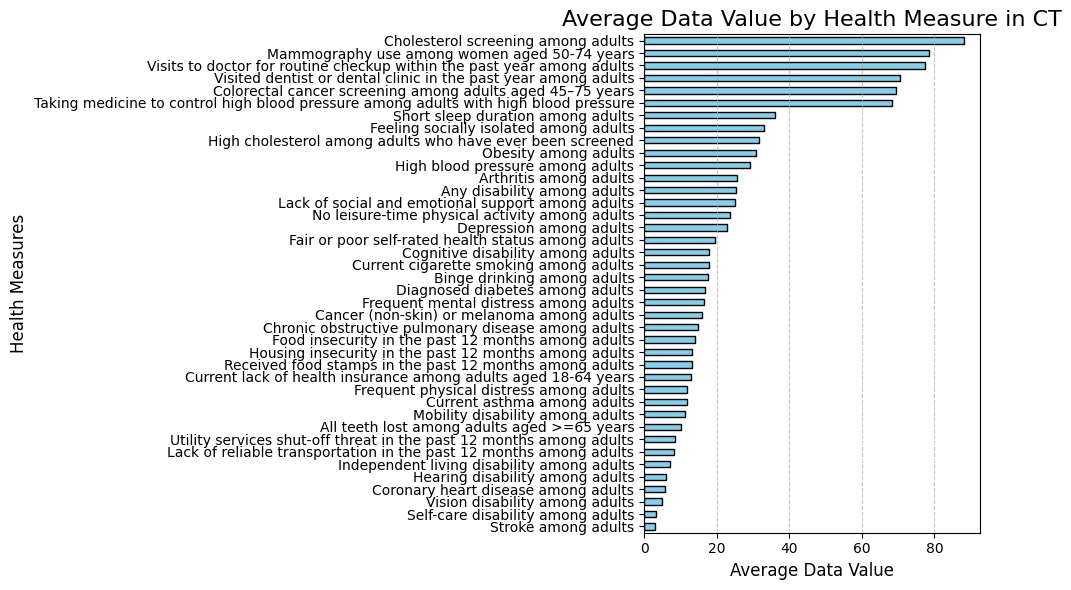

In [90]:
import matplotlib.pyplot as plt

# Aggregate data by Measure to calculate mean Data Value
measure_avg = places_ct.groupby('Measure')['Data Value'].mean().sort_values()

# Plot the data
plt.figure(figsize=(10, 6))
measure_avg.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Average Data Value by Health Measure in CT', fontsize=16)
plt.xlabel('Average Data Value', fontsize=12)
plt.ylabel('Health Measures', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


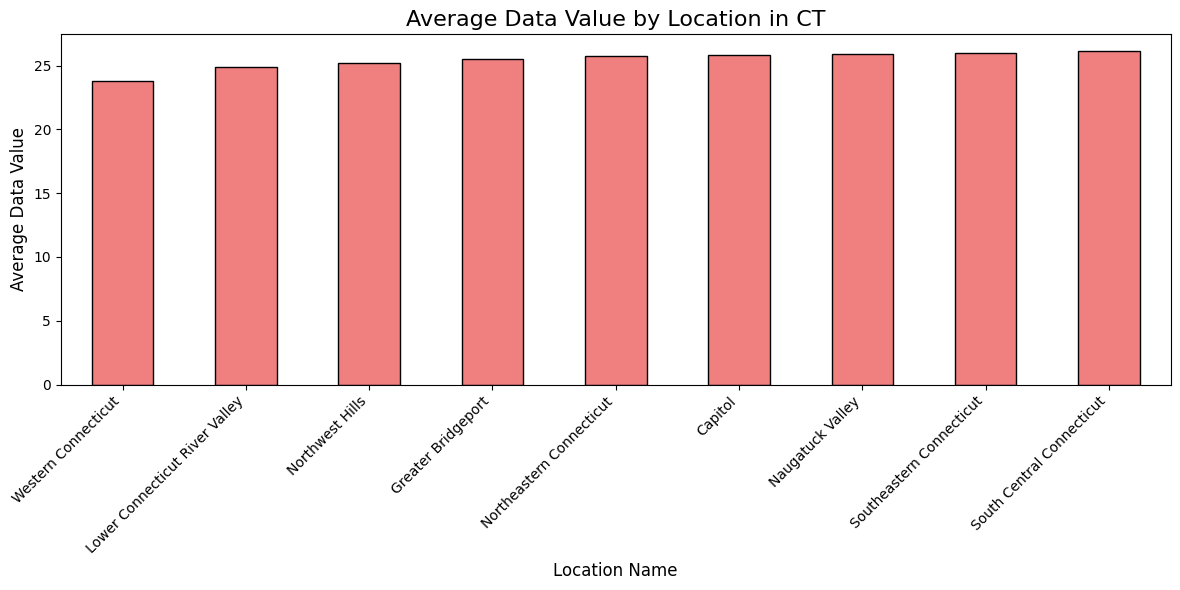

In [92]:
# Aggregate data by Location Name
location_avg = places_ct.groupby('Location Name')['Data Value'].mean().sort_values()

# Plot the data
plt.figure(figsize=(12, 6))
location_avg.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average Data Value by Location in CT', fontsize=16)
plt.xlabel('Location Name', fontsize=12)
plt.ylabel('Average Data Value', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


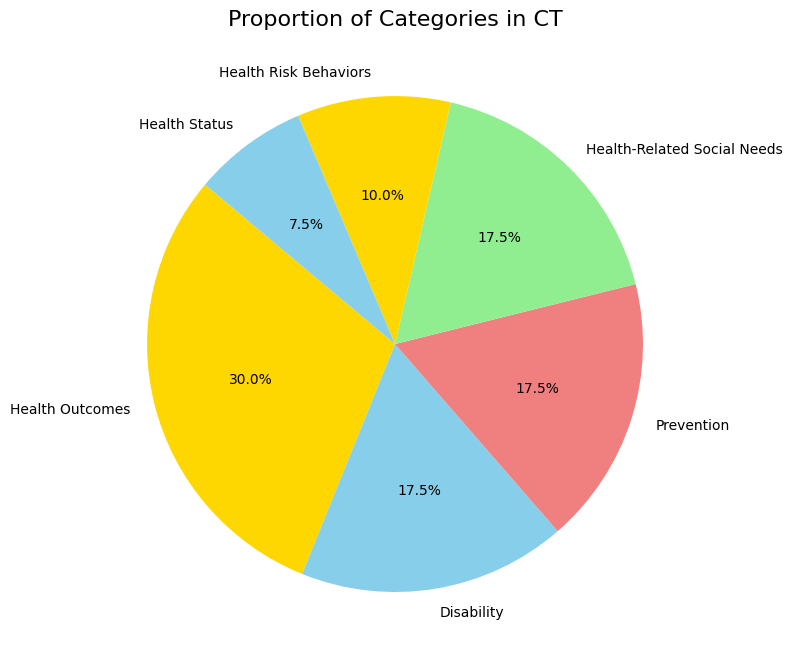

In [93]:
# Calculate category proportions
category_counts = places_ct['Category'].value_counts()

# Plot the data
plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'skyblue', 'lightcoral', 'lightgreen'])
plt.title('Proportion of Categories in CT', fontsize=16)
plt.ylabel('')  # Remove default y-axis label
plt.tight_layout()
plt.show()


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant features and target variable
features = ['Total Population', 'Low Confidence Limit', 'High Confidence Limit']
target = 'Data Value'

# Drop rows with missing values in selected columns
places_ct_cleaned = places_ct.dropna(subset=features + [target])

# Define X (features) and y (target)
X = places_ct_cleaned[features]
y = places_ct_cleaned[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Linear Regression R^2 Score: {r2}")
print(f"Linear Regression Mean Squared Error: {mse}")

# Display model coefficients
coefficients = list(zip(features, linear_model.coef_))
print("\nFeature Coefficients:")
for feature, coef in coefficients:
    print(f"{feature}: {coef}")


Linear Regression R^2 Score: 0.9999853376372304
Linear Regression Mean Squared Error: 0.00683845121316342

Feature Coefficients:
Total Population: -2.361410732327611e-08
Low Confidence Limit: 0.516251808750017
High Confidence Limit: 0.4859487749203808


In [95]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Print evaluation metrics
print(f"\nRandom Forest R^2 Score: {rf_r2}")
print(f"Random Forest Mean Squared Error: {rf_mse}")

# Display feature importance
importances = rf_model.feature_importances_
print("\nFeature Importances:")
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance}")



Random Forest R^2 Score: 0.9998833091076402
Random Forest Mean Squared Error: 0.05442403703703768

Feature Importances:
Total Population: 3.8790349101873135e-05
Low Confidence Limit: 0.5989660257611275
High Confidence Limit: 0.40099518388977073
